In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print("Using tensorflow " ,tf.__version__)

Using tensorflow  2.3.0


In [4]:
#ROTATION 

generator = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range =  40 )#This function provides us with many features and varities of augumentation techniques
#range : -40 degrees to +40 degrees

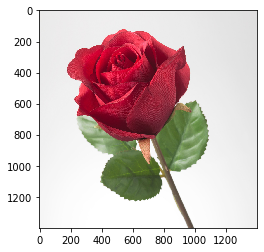

In [11]:
image_path = 'images/flower/rose.jpg'
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 1 classes.


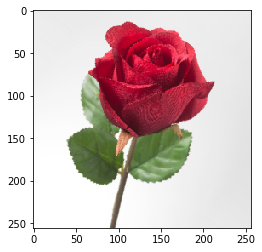

In [15]:
x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))

In [16]:
#WITDTH AND HEIGHT SHIFTS :
generator = tf.keras.preprocessing.image.ImageDataGenerator( width_shift_range= [-100 ,-50 , 10, 100] , height_shift_range= [-50 , 0 , 50])
#We are giving specific values 

Found 1 images belonging to 1 classes.


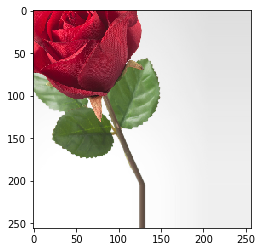

In [17]:
x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))

#Some of the pixels are generated automatically

Found 1 images belonging to 1 classes.


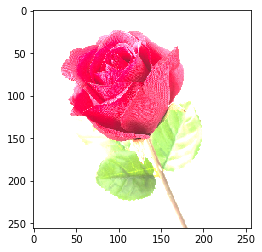

In [22]:
#BRIGHTNESS :
generator = tf.keras.preprocessing.image.ImageDataGenerator(
        brightness_range=(0.5 , 3.0) #This specifies the range starting from 0.5 upto 3.0
)


x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))


Found 1 images belonging to 1 classes.


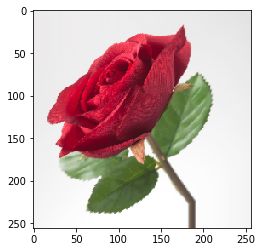

In [24]:
#SHEAR TRANSFORMATION :


generator = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range= 40 #The bottom coordinates will remain in place wheras the top coordinates will be rotated within the range specified here
)


x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))


Found 1 images belonging to 1 classes.


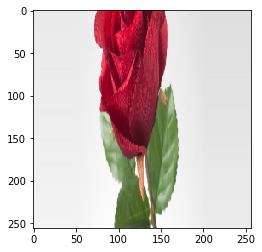

In [25]:
#ZOOM :


generator = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range= [0.5,2.2] #[min , max]
)


x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))


Found 1 images belonging to 1 classes.


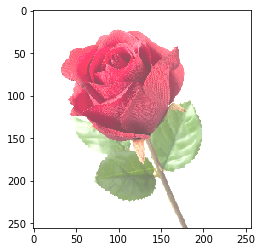

In [30]:
#CHANNEL SHIFT :


generator = tf.keras.preprocessing.image.ImageDataGenerator(
        channel_shift_range= 100 # apply this value to all 3 channels
)


x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))


In [31]:
x.mean()

220.37624

In [32]:
np.array(Image.open(image_path)).mean()

188.85907959183675

Found 1 images belonging to 1 classes.


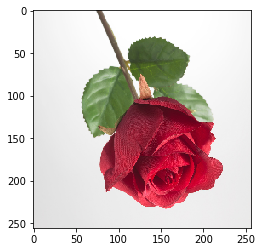

In [34]:
# FLIPS :

generator = tf.keras.preprocessing.image.ImageDataGenerator(
        horizontal_flip= True,
        vertical_flip = True
)


x, y = next(generator.flow_from_directory('images',batch_size=1))#This will iterate over all the examples in the directory specified
plt.imshow(x[0].astype('uint8'))

In [35]:
# NORMALIZATION : 

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center= True,
        featurewise_std_normalization=True,
)

generator.fit(x_train)

x, y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean() , x.std(),y)
print(x_train.mean())

-0.028400451 0.59506404 [[6]]
120.70756512369792


In [36]:
# SAMPLEWISE :

generator = tf.keras.preprocessing.image.ImageDataGenerator(
        samplewise_center= True,
        samplewise_std_normalization=True,
)

x, y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean() , x.std(),y)

6.953875e-08 0.9999999 [[1]]


In [37]:
#RESCALE AND PREPROCESSING METHODS :

generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale= 1.,
        preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input
    
)
x, y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean() , x.std(),y)

0.2618209 0.37427893 [[2]]


In [40]:
# MODEL TRAINING:

generator = tf.keras.preprocessing.image.ImageDataGenerator(
        
        preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input,
        horizontal_flip= True,
        rotation_range=30  
    
)

model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False , input_shape=(32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss= 'sparse_categorical_crossentropy',# we are not converting into one  hot encoder , just taking direct values from 0-9
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [41]:
h = model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs=1,
    steps_per_epoch=10
)

10/10 [==============================] - 1s 110ms/step - loss: 3.1065 - accuracy: 0.0844
